[View in Colaboratory](https://colab.research.google.com/github/MaharshiYeluri01/MachineLearningProjects/blob/master/GoogleStockPrice.ipynb)


# Predicting GOOGLE Stock Price Using  LSTM Nueral Networks


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [57]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Google_Stock_Price_Train.csv" with length 63488 bytes


In [0]:
import io
dataframe= pd.read_csv(io.StringIO(uploaded['Google_Stock_Price_Train.csv'].decode('utf-8')))

In [20]:
dataframe.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [10]:
uploaded1 = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [15]:
for fn in uploaded1.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded1[fn])))

User uploaded file "Google_Stock_Price_Test.csv" with length 1029 bytes


In [0]:
Test_Data= pd.read_csv('Google_Stock_Price_Test.csv')

In [58]:
Test_Data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [60]:
dataframe.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [0]:
training_set = dataframe.iloc[:, 1:2].values

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [62]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [0]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [64]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [41]:
X_train.shape

(1198, 60, 1)

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

Using TensorFlow backend.


In [0]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')



In [45]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0484
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0072
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0058
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0053
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0050
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [==============================] - 7s 6ms/step - l

In [0]:
print(regressor.get_weights())

In [0]:
real_stock_price = Test_Data.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((dataframe['Open'], Test_Data['Open']), axis = 0)

In [0]:
inputs = dataset_total[len(dataset_total) - len(Test_Data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

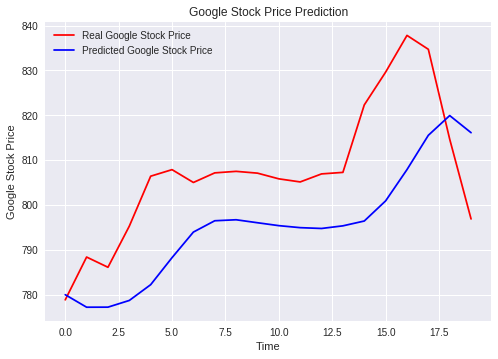

In [56]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()